# 3.3 Clustering: Unsupervised Job Grouping with RAPIDS cuML
In this notebook we cluster job postings using feature embeddings and analyze the clusters using job titles.

## RAPIDS Environment Assertion

In [1]:
import os
assert os.environ.get("RAPIDS_NO_INITIALIZE") is None, "Make sure you're using the RAPIDS Kaggle Docker image, GPU T4 as accelerator"
!nvidia-smi

Sat May 17 10:18:08 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Libraries Required

In [2]:
import gc
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import load_npz
from mpl_toolkits.mplot3d import Axes3D

from cuml.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score

## Data Loading

In [3]:
test_df = pd.read_parquet('/kaggle/input/ds-preprocessing-output-files/test_data.parquet')
X_test_emb  = np.load('/kaggle/input/ds-preprocessing-output-files/fused_emb_test.npy')
X_test_skills = load_npz('/kaggle/input/ds-preprocessing-output-files/skills_tfidf_test.npz').toarray()

job_title_encoder = joblib.load('/kaggle/input/ds-preprocessing-output-files/label_encoder_job_title (1).pkl')
job_titles = job_title_encoder.inverse_transform(test_df['Job Title_encoded'].values)
test_df['job_title'] = job_titles

print('> Data loaded successfully')

> Data loaded successfully


## Clustering with cuML KMeans
- We'll use KMeans for our clustering task. Number of clusters (k) can vary based on the users needs.

In [4]:
# Feature sets and cluster numbers to loop through
feature_sets = [
    {'name': 'Skills TF-IDF', 'data': X_test_skills, 'type': 'tfidf'},
    {'name': 'Role SBERT', 'data': X_test_emb, 'type': 'sbert'}
]

cluster_numbers = [10, 25, 40]


Clustering Analysis based on: Skills TF-IDF with K=10

1) Fitting KMeans...


/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)


KMeans clustering complete. Number of clusters: 10

2) Creating 3D PCA visualization...


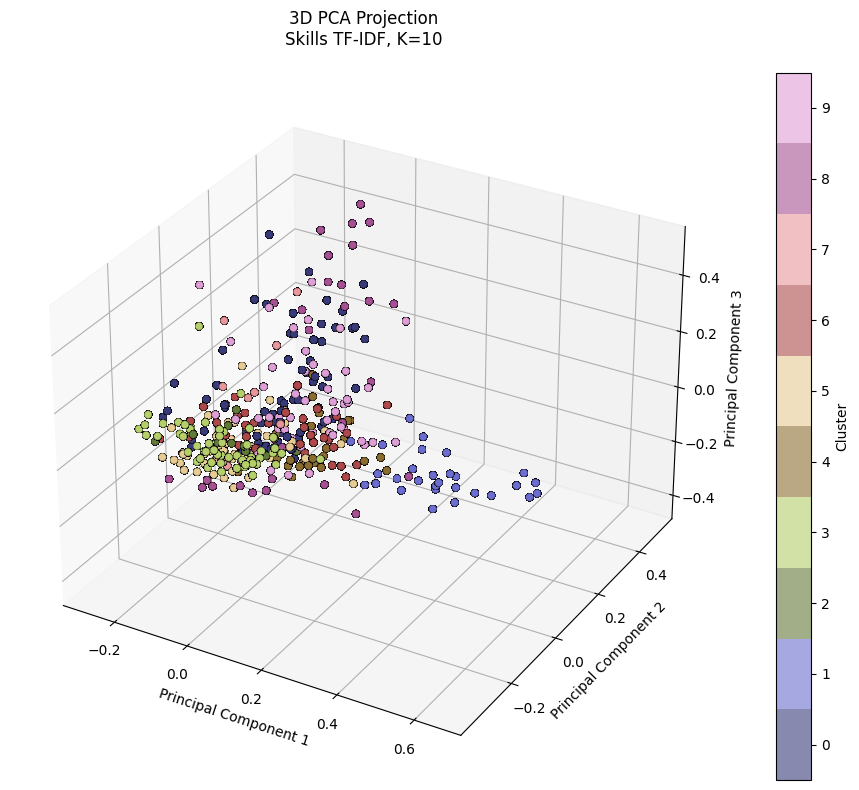

3) Computing Davies Bouldin Score [0,∞) -The closer to 0 the better- ...
Davies-Bouldin Score: 4.1020

4) Analyzing top job titles per cluster...
Top 5 job titles per cluster:


job_title,Data Analyst,Purchasing Agent,Social Media Manager,Procurement Specialist,Litigation Attorney,UX/UI Designer,Graphic Designer,Architect,Interior Designer,Landscape Architect,...,Event Planner,Supply Chain Manager,Event Coordinator,Research Analyst,Marketing Analyst,Software Tester,Procurement Manager,QA Analyst,Paralegal,Marketing Manager
cluster,,,,,,,,,,,,,,,,,,,,,
0,2610.0,2593.0,2117.0,2084.0,1585.0,,,,,,...,,,,,,,,,,
1,,,,,,7282.0,2082.0,1584.0,1574.0,1567.0,...,,,,,,,,,,
2,,,,,,,,,,,...,,,,,,,,,,
3,,,,,,,,,,,...,,,,,,,,,,
4,,,,,,,,,,,...,,,,,,,,,,
5,,,,,,,,,,,...,,,,,,,,,,
6,,,,,,,,,,,...,,,,,,,,,,
7,,,,,,,,,,,...,,,,,,,,,,
8,,,,,,,,,,,...,2083.0,1558.0,1557.0,1555.0,1551.0,,,,,



5) Creating cluster distribution plot...


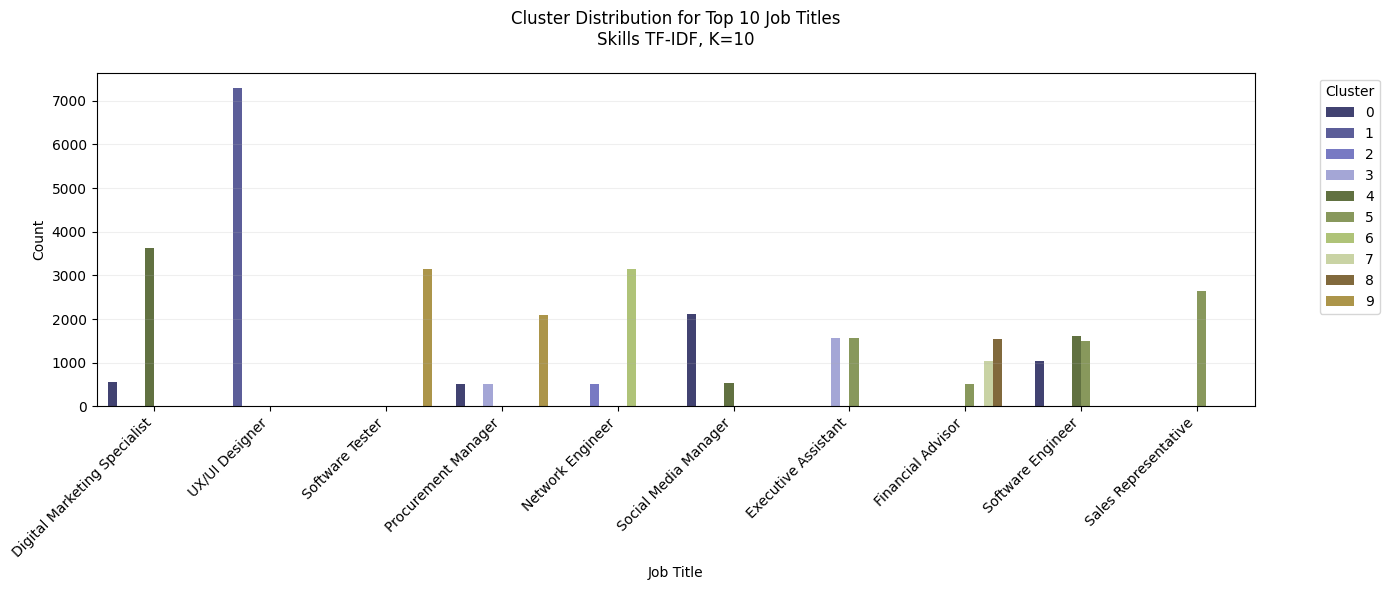

6) Analyzing cluster sizes...


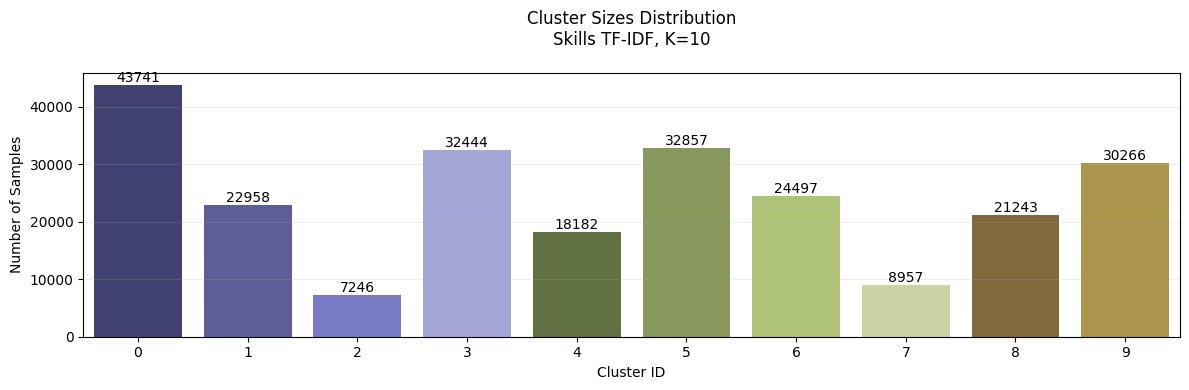


7) Analyzing cluster centers...

Top features per cluster:
Cluster 0: ['tfidf_130', 'tfidf_5', 'tfidf_133', 'tfidf_75', 'tfidf_236']
Cluster 1: ['tfidf_81', 'tfidf_287', 'tfidf_82', 'tfidf_184', 'tfidf_132']
Cluster 2: ['tfidf_93', 'tfidf_278', 'tfidf_189', 'tfidf_51', 'tfidf_228']
Cluster 3: ['tfidf_236', 'tfidf_35', 'tfidf_51', 'tfidf_12', 'tfidf_174']
Cluster 4: ['tfidf_58', 'tfidf_231', 'tfidf_172', 'tfidf_8', 'tfidf_239']
Cluster 5: ['tfidf_152', 'tfidf_130', 'tfidf_147', 'tfidf_259', 'tfidf_156']
Cluster 6: ['tfidf_280', 'tfidf_130', 'tfidf_261', 'tfidf_234', 'tfidf_143']
Cluster 7: ['tfidf_221', 'tfidf_12', 'tfidf_222', 'tfidf_152', 'tfidf_180']
Cluster 8: ['tfidf_178', 'tfidf_75', 'tfidf_5', 'tfidf_76', 'tfidf_258']
Cluster 9: ['tfidf_267', 'tfidf_5', 'tfidf_204', 'tfidf_268', 'tfidf_216']

COMPLETED Analysis based on: Skills TF-IDF with K=10



Clustering Analysis based on: Skills TF-IDF with K=25

1) Fitting KMeans...


/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)


KMeans clustering complete. Number of clusters: 25

2) Creating 3D PCA visualization...


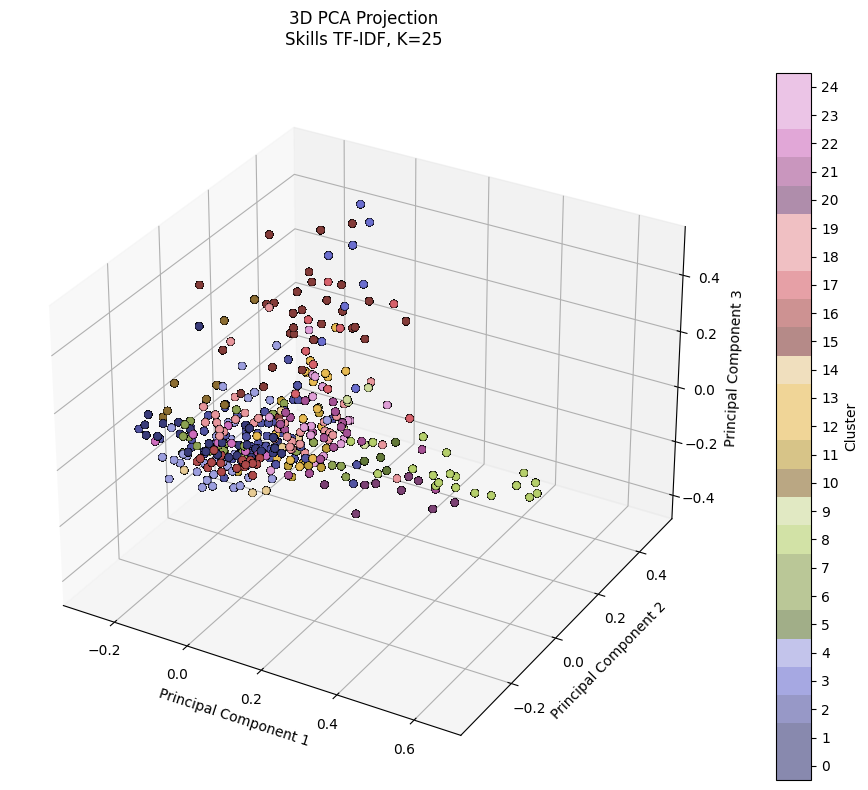

3) Computing Davies Bouldin Score [0,∞) -The closer to 0 the better- ...
Davies-Bouldin Score: 2.7748

4) Analyzing top job titles per cluster...
Top 5 job titles per cluster:


job_title,Occupational Therapist,Speech Therapist,Social Worker,Substance Abuse Counselor,Psychologist,Administrative Assistant,Executive Assistant,Network Administrator,Project Coordinator,Office Manager,...,HR Manager,HR Coordinator,HR Generalist,Aerospace Engineer,Electrical Engineer,Business Analyst,Data Engineer,SEM Specialist,SEO Specialist,SEO Analyst
cluster,,,,,,,,,,,,,,,,,,,,,
0,1583.0,1564.0,1558.0,1082.0,1043.0,,,,,,...,,,,,,,,,,
1,,,,,,2623.0,1557.0,1036.0,1021.0,536.0,...,,,,,,,,,,
2,,,,,,,,,,,...,,,,,,,,,,
3,,,,,,,,,,,...,,,,,,,,,,
4,,,,,,,1560.0,,,,...,,,,,,,,,,
5,,,,,,,,,,,...,,,,,,,,,,
6,,,,,,,,1601.0,,,...,,,,,,,,,,
7,,,,,,,,,,,...,,,,,,,,,,
8,,,,,,,,,,,...,,,,,,,,,,



5) Creating cluster distribution plot...


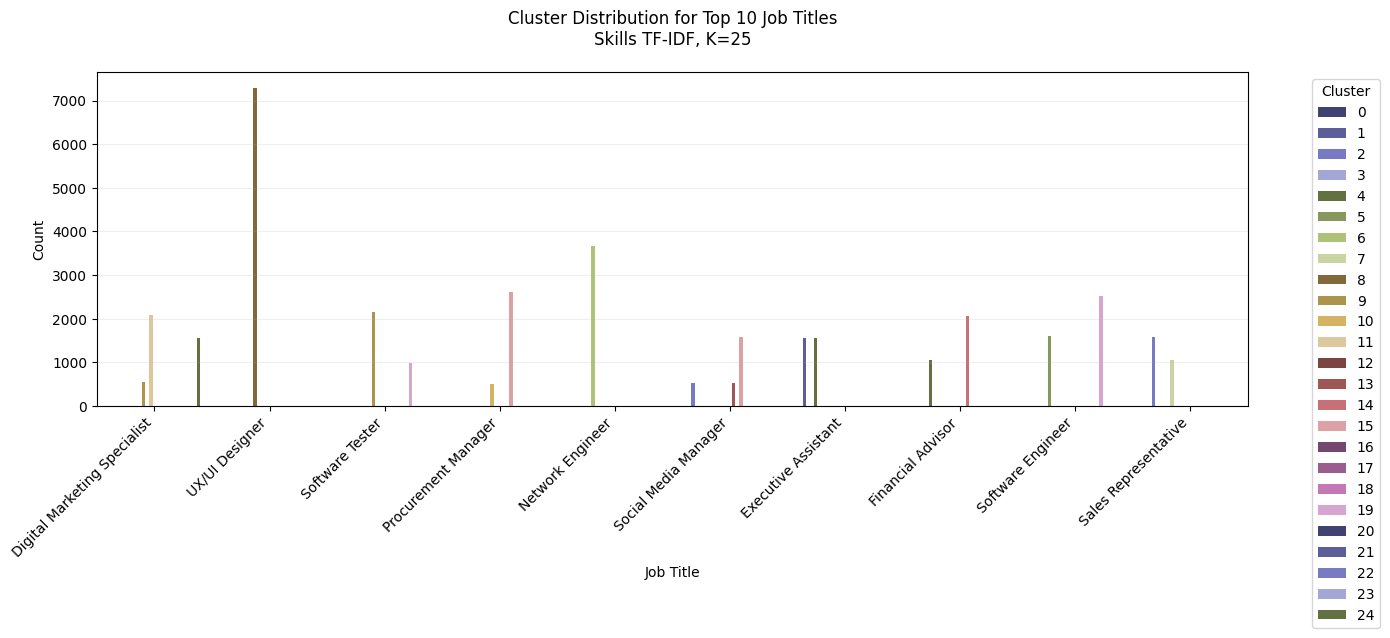

6) Analyzing cluster sizes...


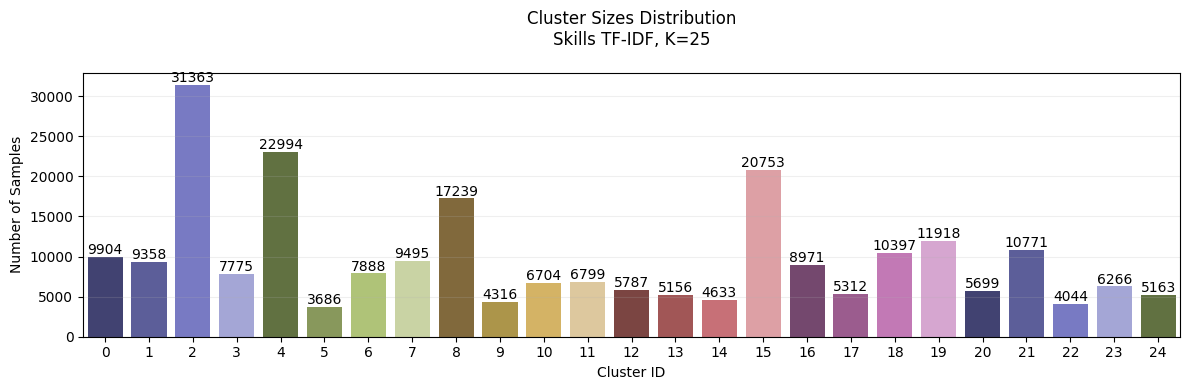


7) Analyzing cluster centers...

Top features per cluster:
Cluster 0: ['tfidf_270', 'tfidf_263', 'tfidf_12', 'tfidf_176', 'tfidf_91']
Cluster 1: ['tfidf_171', 'tfidf_273', 'tfidf_272', 'tfidf_152', 'tfidf_236']
Cluster 2: ['tfidf_130', 'tfidf_145', 'tfidf_152', 'tfidf_212', 'tfidf_133']
Cluster 3: ['tfidf_75', 'tfidf_243', 'tfidf_167', 'tfidf_79', 'tfidf_5']
Cluster 4: ['tfidf_152', 'tfidf_178', 'tfidf_259', 'tfidf_130', 'tfidf_147']
Cluster 5: ['tfidf_106', 'tfidf_296', 'tfidf_114', 'tfidf_113', 'tfidf_72']
Cluster 6: ['tfidf_228', 'tfidf_137', 'tfidf_199', 'tfidf_130', 'tfidf_38']
Cluster 7: ['tfidf_192', 'tfidf_193', 'tfidf_143', 'tfidf_130', 'tfidf_263']
Cluster 8: ['tfidf_81', 'tfidf_287', 'tfidf_82', 'tfidf_184', 'tfidf_200']
Cluster 9: ['tfidf_267', 'tfidf_268', 'tfidf_277', 'tfidf_177', 'tfidf_36']
Cluster 10: ['tfidf_39', 'tfidf_254', 'tfidf_253', 'tfidf_152', 'tfidf_40']
Cluster 11: ['tfidf_239', 'tfidf_240', 'tfidf_161', 'tfidf_130', 'tfidf_8']
Cluster 12: ['tfidf_130', 'tf

/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)


KMeans clustering complete. Number of clusters: 40

2) Creating 3D PCA visualization...


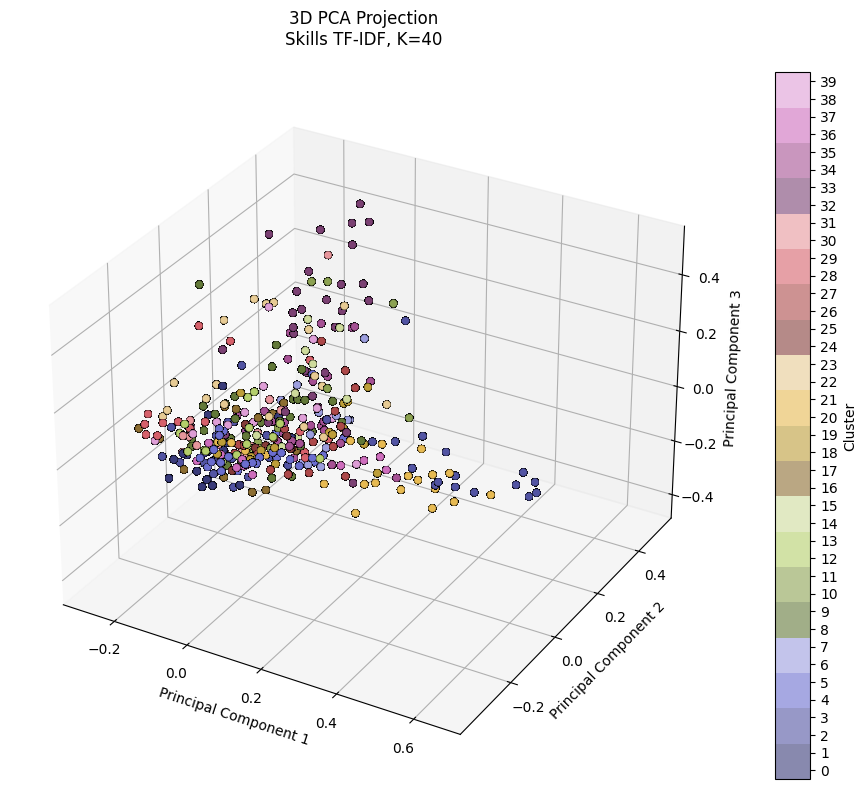

3) Computing Davies Bouldin Score [0,∞) -The closer to 0 the better- ...
Davies-Bouldin Score: 2.3722

4) Analyzing top job titles per cluster...
Top 5 job titles per cluster:


job_title,Account Executive,Account Manager,Marketing Director,Business Development Manager,Customer Success Manager,Event Coordinator,Executive Assistant,Event Planner,Finance Manager,Wedding Planner,...,Web Developer,Market Research Analyst,Email Marketing Specialist,Registered Nurse,Nurse Manager,Nurse Practitioner,IT Support Specialist,SEO Analyst,Art Teacher,HR Generalist
cluster,,,,,,,,,,,,,,,,,,,,,
0,1052.0,1043.0,553.0,524.0,518.0,,,,,,...,,,,,,,,,,
1,,,,,,2083.0,1560.0,1072.0,528.0,525.0,...,,,,,,,,,,
2,,,,,,,,,,,...,,,,,,,,,,
3,,,,,,,,,,,...,,,,,,,,,,
4,,,,,,,,,,,...,,,,,,,,,,
5,,,,,,,,,,,...,,,,,,,,,,
6,,,,,,,,,,,...,,,,,,,,,,
7,,,,,,,,,,,...,,,,,,,,,,
8,,,,,,,,,,,...,,,,,,,,,,



5) Creating cluster distribution plot...


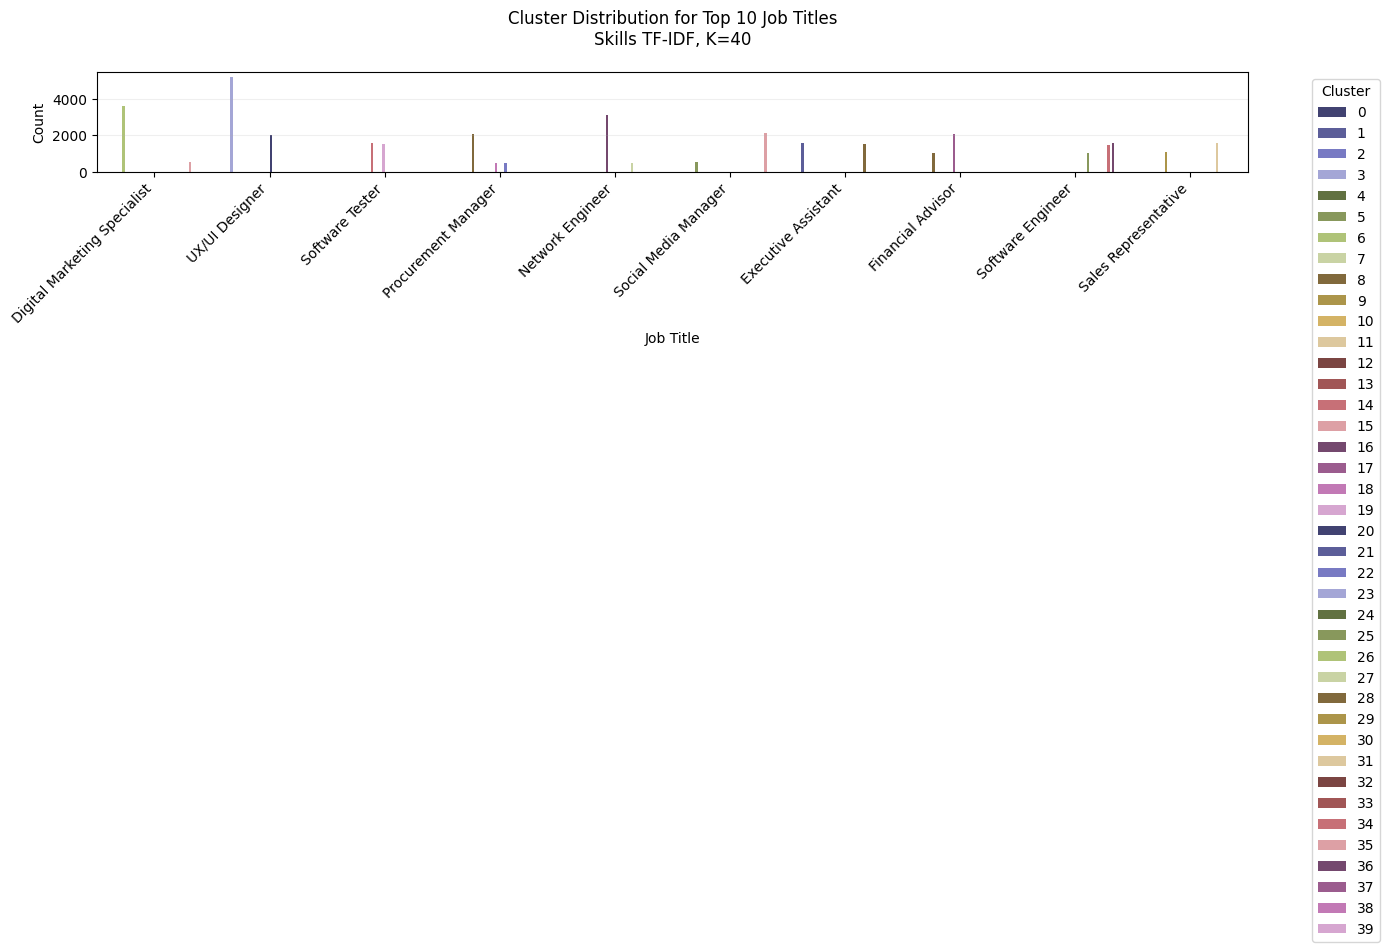

6) Analyzing cluster sizes...


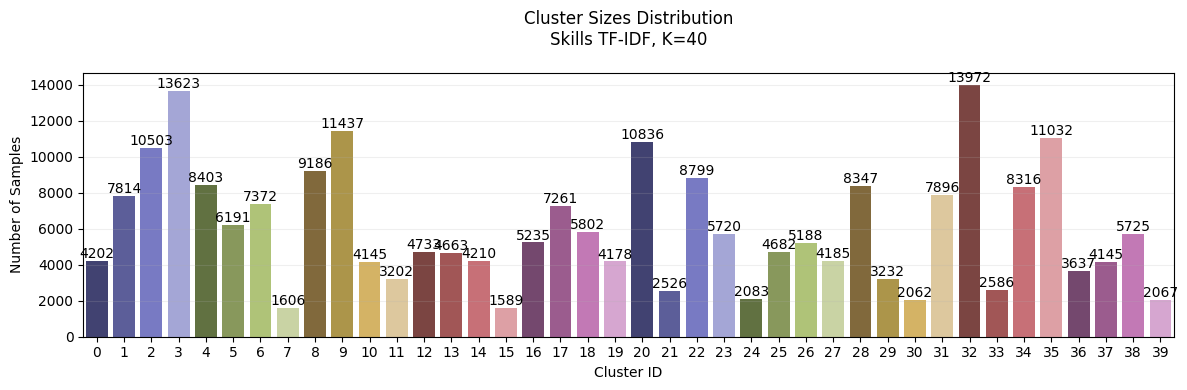


7) Analyzing cluster centers...

Top features per cluster:
Cluster 0: ['tfidf_224', 'tfidf_134', 'tfidf_169', 'tfidf_249', 'tfidf_45']
Cluster 1: ['tfidf_152', 'tfidf_292', 'tfidf_65', 'tfidf_178', 'tfidf_28']
Cluster 2: ['tfidf_147', 'tfidf_259', 'tfidf_130', 'tfidf_152', 'tfidf_260']
Cluster 3: ['tfidf_81', 'tfidf_287', 'tfidf_200', 'tfidf_297', 'tfidf_298']
Cluster 4: ['tfidf_176', 'tfidf_35', 'tfidf_174', 'tfidf_175', 'tfidf_163']
Cluster 5: ['tfidf_58', 'tfidf_68', 'tfidf_231', 'tfidf_160', 'tfidf_59']
Cluster 6: ['tfidf_239', 'tfidf_8', 'tfidf_240', 'tfidf_231', 'tfidf_161']
Cluster 7: ['tfidf_120', 'tfidf_280', 'tfidf_89', 'tfidf_11', 'tfidf_268']
Cluster 8: ['tfidf_130', 'tfidf_63', 'tfidf_210', 'tfidf_16', 'tfidf_209']
Cluster 9: ['tfidf_130', 'tfidf_66', 'tfidf_249', 'tfidf_51', 'tfidf_194']
Cluster 10: ['tfidf_145', 'tfidf_149', 'tfidf_67', 'tfidf_41', 'tfidf_42']
Cluster 11: ['tfidf_206', 'tfidf_204', 'tfidf_64', 'tfidf_241', 'tfidf_242']
Cluster 12: ['tfidf_12', 'tfidf_22

/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)


KMeans clustering complete. Number of clusters: 10

2) Creating 3D PCA visualization...


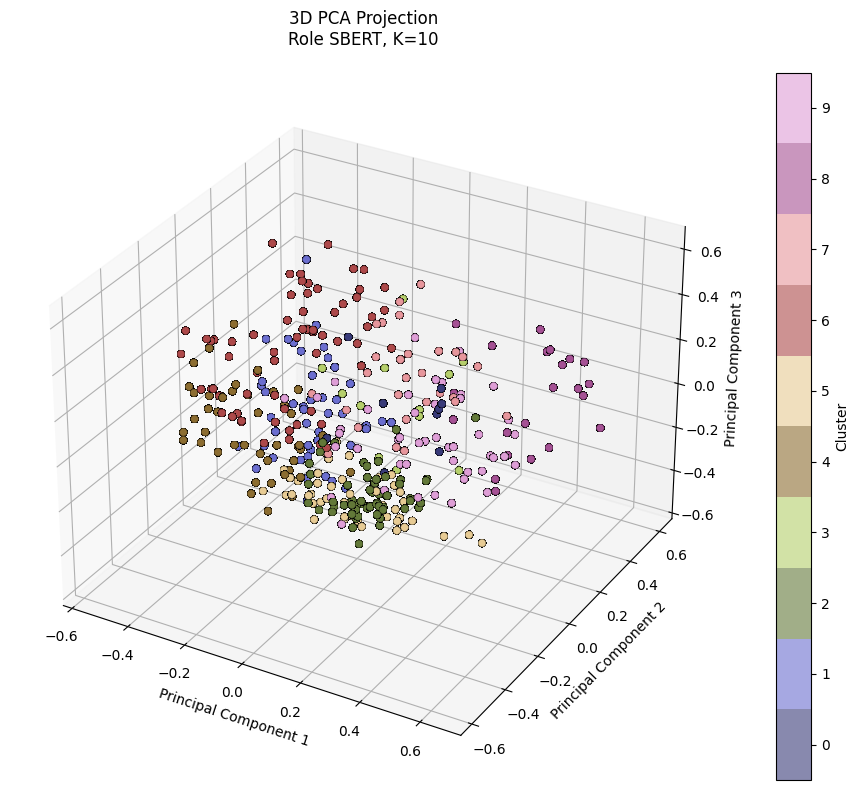

3) Computing Davies Bouldin Score [0,∞) -The closer to 0 the better- ...
Davies-Bouldin Score: 3.0846

4) Analyzing top job titles per cluster...
Top 5 job titles per cluster:


job_title,Systems Administrator,Chemical Analyst,Mechanical Engineer,Process Engineer,Aerospace Engineer,Social Media Manager,Data Analyst,Procurement Manager,Marketing Analyst,Research Analyst,...,Systems Analyst,UX/UI Designer,UI Developer,UX Researcher,Graphic Designer,Architect,Landscape Architect,Civil Engineer,Interior Designer,Urban Planner
cluster,,,,,,,,,,,,,,,,,,,,,
0,1582.0,1078.0,1068.0,1040.0,509.0,,,,,,...,,,,,,,,,,
1,,,,,,2642.0,2108.0,2098.0,2089.0,2056.0,...,,,,,,,,,,
2,,,,,,,,,,,...,,,,,,,,,,
3,,,,,,,,,,,...,,,,,,,,,,
4,,,,,,,,,,,...,,,,,,,,,,
5,,,,,,,,,,,...,,,,,,,,,,
6,,,,,,,,,,,...,,,,,,,,,,
7,,,,,,,,,,,...,1056.0,,,,,,,,,
8,,,,,,,,,,,...,,7282.0,2089.0,1581.0,1560.0,,,,,



5) Creating cluster distribution plot...


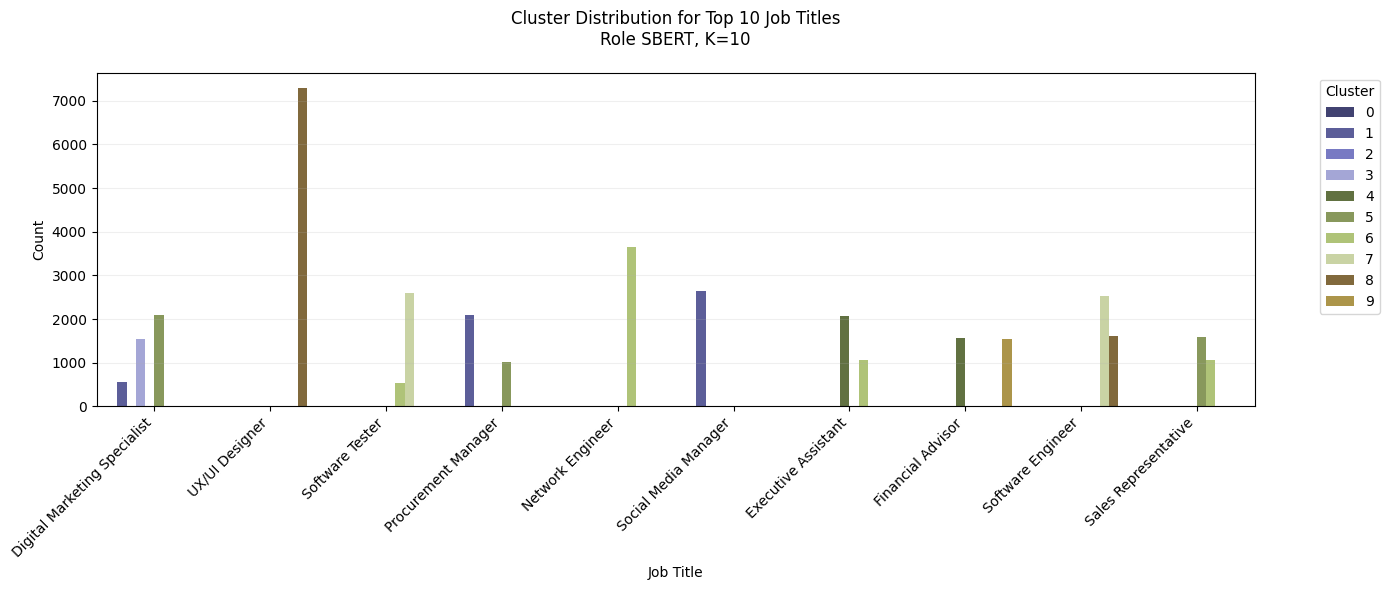

6) Analyzing cluster sizes...


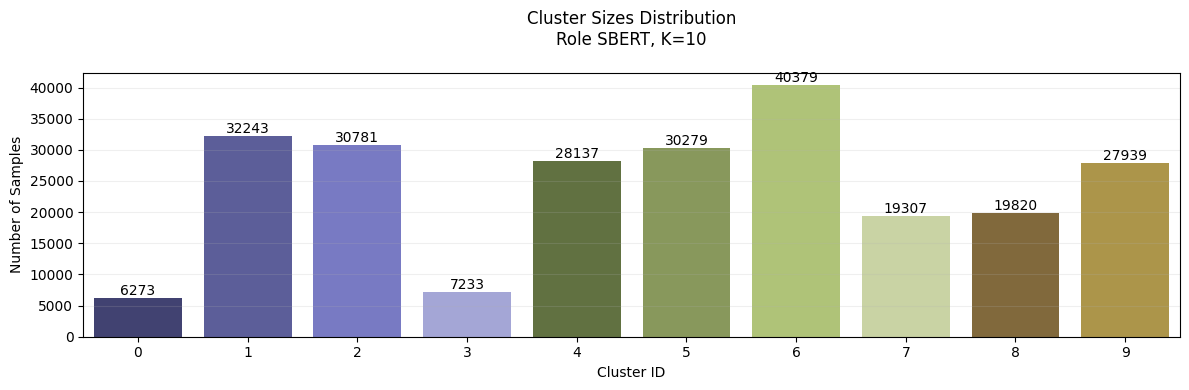


7) Analyzing cluster centers...

SBERT cluster centers (first 5 dimensions):
Cluster 0: [ 0.1182 -0.0124 -0.1628  0.1858  0.0231]...
Cluster 1: [-0.3341 -0.2032  0.202  -0.0572 -0.1092]...
Cluster 2: [ 0.1925  0.3512 -0.0084 -0.2067 -0.1102]...
Cluster 3: [-0.071  -0.3374  0.1663 -0.0558 -0.1262]...
Cluster 4: [-0.2901  0.1438 -0.0052  0.0563  0.1128]...
Cluster 5: [0.0397 0.0878 0.2444 0.2561 0.0449]...
Cluster 6: [-0.2531 -0.0058 -0.2492 -0.0681  0.0247]...
Cluster 7: [ 0.122  -0.0493 -0.2538  0.1992 -0.1706]...
Cluster 8: [ 0.4197 -0.4049 -0.0428 -0.0768 -0.0305]...
Cluster 9: [ 0.1852 -0.0377  0.0406 -0.0768  0.2578]...

COMPLETED Analysis based on: Role SBERT with K=10



Clustering Analysis based on: Role SBERT with K=25

1) Fitting KMeans...


/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)


KMeans clustering complete. Number of clusters: 25

2) Creating 3D PCA visualization...


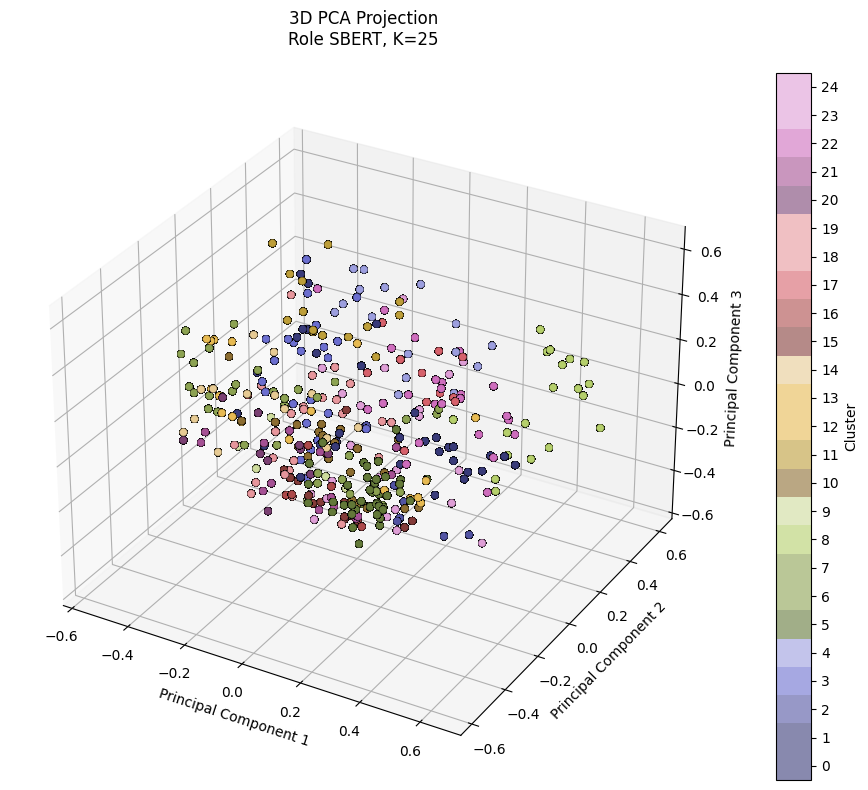

3) Computing Davies Bouldin Score [0,∞) -The closer to 0 the better- ...
Davies-Bouldin Score: 2.4503

4) Analyzing top job titles per cluster...
Top 5 job titles per cluster:


job_title,Customer Support Specialist,Sales Representative,Customer Success Manager,Customer Service Representative,Systems Administrator,Landscape Architect,Interior Designer,Civil Engineer,Architect,Urban Planner,...,Aerospace Engineer,Electrical Engineer,Electrical Designer,Structural Engineer,Chemical Engineer,Public Relations Specialist,Pharmaceutical Sales Representative,SEO Specialist,Copywriter,SEO Analyst
cluster,,,,,,,,,,,,,,,,,,,,,
0,2589.0,1066.0,1057.0,1054.0,1010.0,,,,,,...,,,,,,,,,,
1,,,,,,2072.0,1574.0,1069.0,1062.0,1030.0,...,,,,,,,,,,
2,,,517.0,,,,,,,,...,,,,,,,,,,
3,,,,,,,,,,,...,,,,,,,,,,
4,,,,,,,,,,,...,,,,,,,,,,
5,,,,,,,,,,,...,,,,,,,,,,
6,,,,,,,,,,,...,,,,,,,,,,
7,,,,,,,,,,,...,,,,,,,,,,
8,,,,,,,,,,,...,,,,,,,,,,



5) Creating cluster distribution plot...


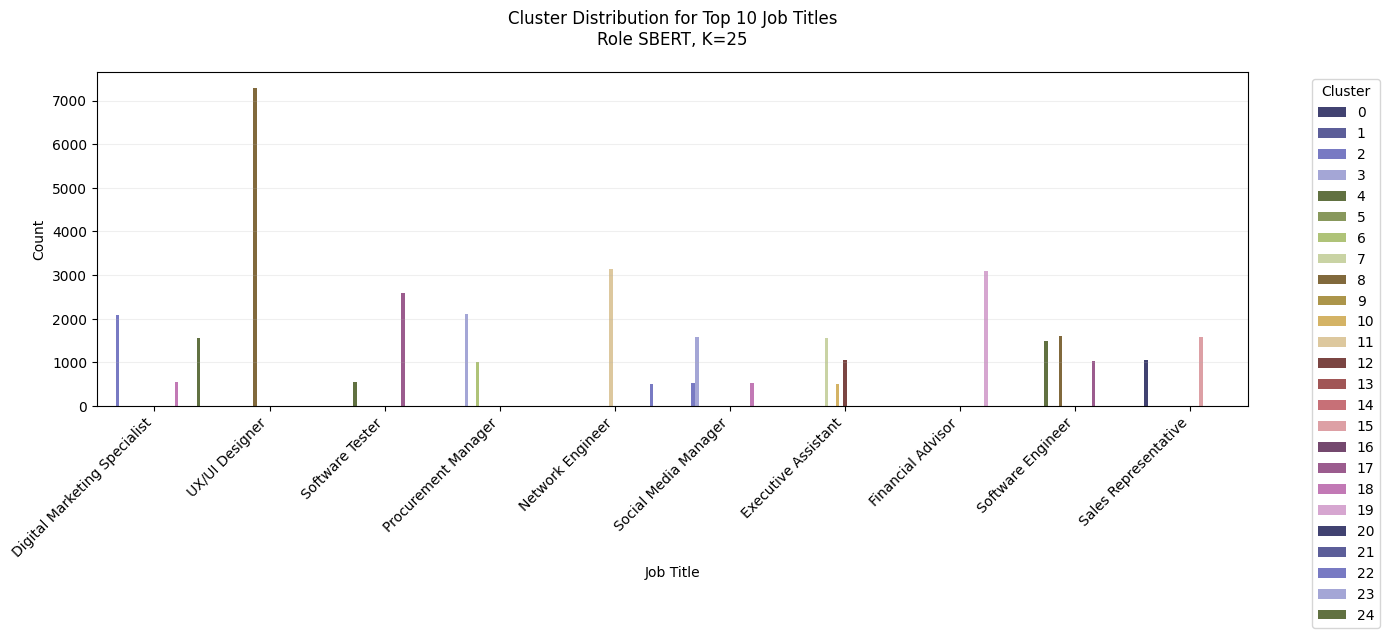

6) Analyzing cluster sizes...


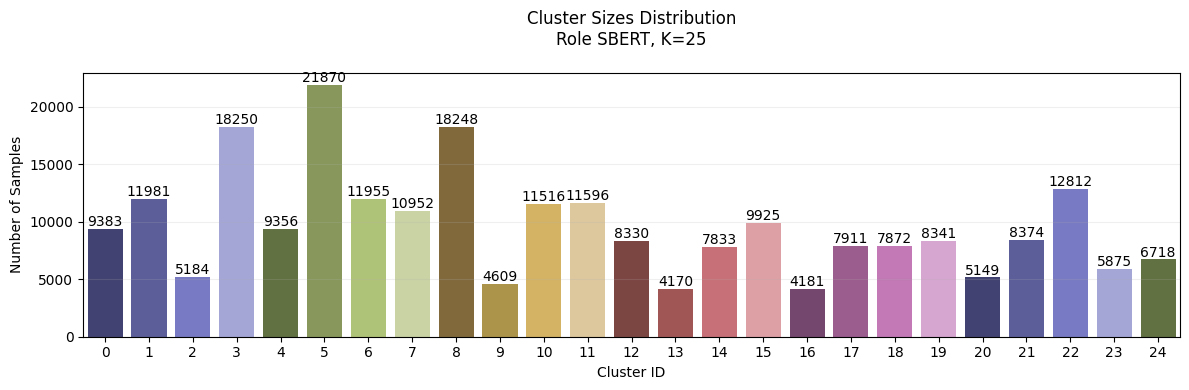


7) Analyzing cluster centers...

SBERT cluster centers (first 5 dimensions):
Cluster 0: [-0.2359 -0.0335 -0.1241 -0.1042  0.0039]...
Cluster 1: [ 0.2126 -0.0282  0.0828 -0.1131  0.2845]...
Cluster 2: [ 0.1487 -0.0017  0.3343  0.1583 -0.1063]...
Cluster 3: [-0.3554 -0.2099  0.0722 -0.0251 -0.2127]...
Cluster 4: [ 0.0415 -0.2392 -0.2875  0.0369 -0.0955]...
Cluster 5: [ 0.2038  0.3836 -0.0297 -0.2249 -0.1138]...
Cluster 6: [0.0196 0.0826 0.035  0.418  0.1595]...
Cluster 7: [-0.3252  0.116  -0.1516  0.0378  0.2517]...
Cluster 8: [ 0.4415 -0.4087 -0.0345 -0.0775 -0.0259]...
Cluster 9: [-0.3084 -0.1302  0.4067  0.0023  0.0493]...
Cluster 10: [-0.0398  0.1173  0.0493 -0.1467  0.0473]...
Cluster 11: [-0.1713 -0.0961 -0.4258  0.1594 -0.0506]...
Cluster 12: [-0.2671  0.198  -0.215  -0.1164  0.1573]...
Cluster 13: [ 0.2789  0.1689  0.048  -0.1146  0.0801]...
Cluster 14: [-0.2577  0.1575 -0.1268  0.0243 -0.009 ]...
Cluster 15: [-0.0252  0.1041  0.2106  0.2556 -0.01  ]...
Cluster 16: [-0.0942  0.1

/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)


KMeans clustering complete. Number of clusters: 40

2) Creating 3D PCA visualization...


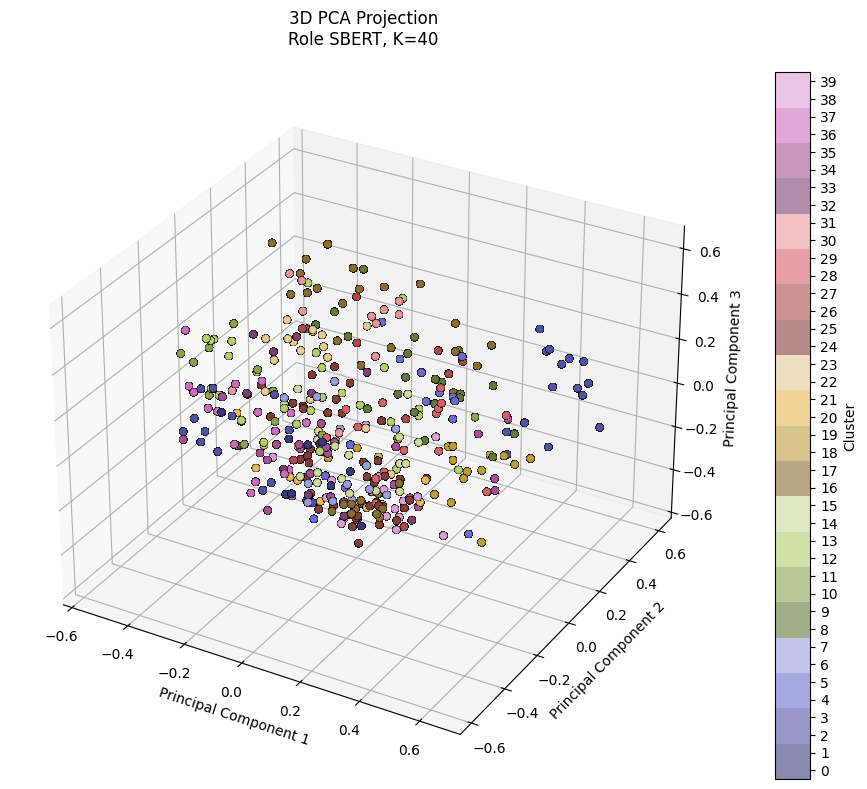

3) Computing Davies Bouldin Score [0,∞) -The closer to 0 the better- ...
Davies-Bouldin Score: 2.2967

4) Analyzing top job titles per cluster...
Top 5 job titles per cluster:


job_title,Event Planner,Event Coordinator,Event Manager,Executive Assistant,Marketing Coordinator,Administrative Assistant,HR Coordinator,Customer Service Representative,Tax Consultant,Legal Advisor,...,Procurement Specialist,HR Manager,QA Engineer,Investment Analyst,Investment Banker,Financial Advisor,Financial Analyst,Public Relations Specialist,Marketing Director,Wedding Planner
cluster,,,,,,,,,,,,,,,,,,,,,
0,1596.0,1568.0,524.0,505.0,493.0,,,,,,...,,,,,,,,,,
1,,,,1052.0,,1575.0,995.0,547.0,517.0,,...,,,,,,,,,,
2,,,,,,,,,1056.0,1578.0,...,,,,,,,,,,
3,,,,,,,,,,,...,,,,,,,,,,
4,,,,,,,,,,,...,,,,,,,,,,
5,,,,,,,,,,,...,,,,,,,,,,
6,,,,,,,,,,,...,,,,,,,,,,
7,,,,,,,,,,,...,,,,,,,,,,
8,,,,,,,,,,,...,,,,,,,,,,



5) Creating cluster distribution plot...


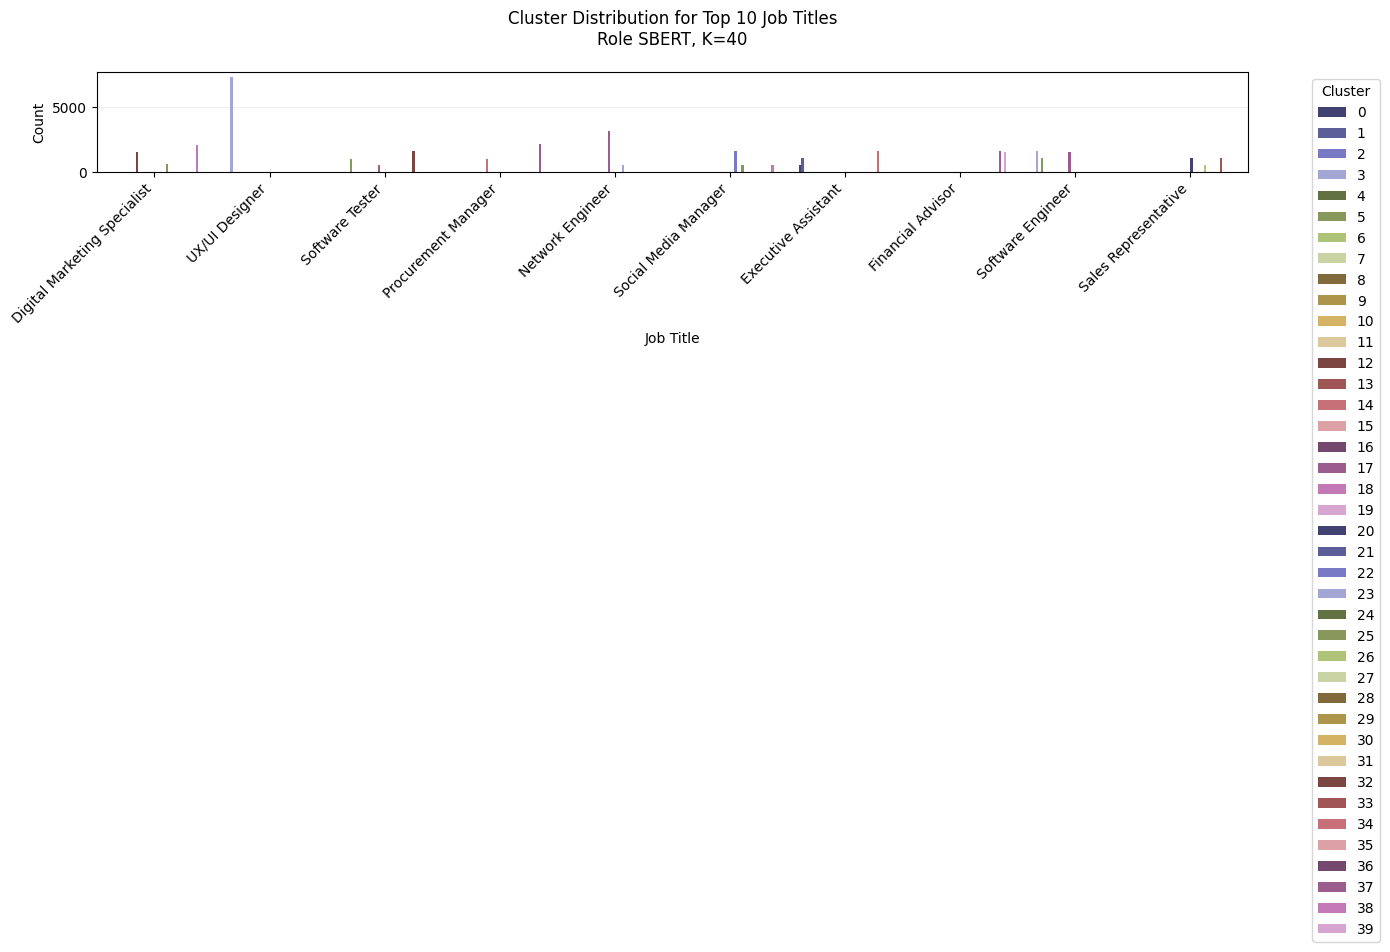

6) Analyzing cluster sizes...


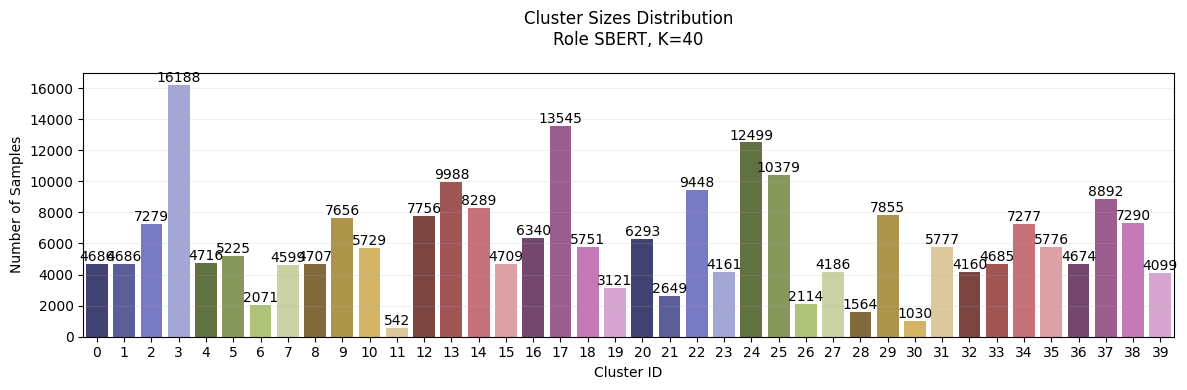


7) Analyzing cluster centers...

SBERT cluster centers (first 5 dimensions):
Cluster 0: [-0.0685  0.1686  0.107   0.1569  0.2699]...
Cluster 1: [-0.1601  0.2423 -0.0992 -0.105   0.1121]...
Cluster 2: [-0.3105  0.2273 -0.0311 -0.0621 -0.0118]...
Cluster 3: [ 0.4548 -0.4335 -0.0655 -0.0952 -0.0215]...
Cluster 4: [-0.0934 -0.1565  0.4258  0.0512  0.0391]...
Cluster 5: [ 0.1587 -0.0904 -0.2666  0.1547 -0.2013]...
Cluster 6: [-0.0774  0.0629 -0.1456  0.0183  0.4361]...
Cluster 7: [ 0.1711  0.3885 -0.0719 -0.1178 -0.0536]...
Cluster 8: [-0.0652 -0.1177 -0.3047  0.1375 -0.0944]...
Cluster 9: [ 0.1812 -0.2219 -0.0296 -0.1134  0.3047]...
Cluster 10: [-0.3729  0.056  -0.1171 -0.05    0.1751]...
Cluster 11: [ 0.3535 -0.0374 -0.1244 -0.1406 -0.1337]...
Cluster 12: [-0.1268 -0.3481  0.2341 -0.0876 -0.1056]...
Cluster 13: [-0.2584  0.158  -0.2222 -0.1273  0.0447]...
Cluster 14: [0.0552 0.1262 0.0752 0.4794 0.109 ]...
Cluster 15: [ 0.1109  0.0849  0.0182 -0.0363  0.2149]...
Cluster 16: [ 0.2497  0.4

In [5]:
# Looping through all feature-cluster combinations
for feature in feature_sets:
    feature_name = feature['name']
    X_cluster = feature['data']
    feat_type = feature['type']
    
    for K in cluster_numbers:
        print(f"\n{'='*80}")
        print(f"Clustering Analysis based on: {feature_name} with K={K}")
        print(f"{'='*80}\n")
        
        # 1) Fit the data
        print("1) Fitting KMeans...")
        kmeans = KMeans(n_clusters=K, random_state=42)
        clusters = kmeans.fit_predict(X_cluster)
        test_df['cluster'] = clusters  # Added to dataframe for analysis
        print(f'KMeans clustering complete. Number of clusters: {K}\n')
        
        # 2) PCA Visualization (3D)
        print("2) Creating 3D PCA visualization...")
        pca = PCA(n_components=3, random_state=42)
        X_pca = pca.fit_transform(X_cluster)

        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')

        scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], 
                             c=clusters, cmap='tab20b', alpha=0.6, 
                             s=30, edgecolor='k', linewidth=0.2)

        ax.set_title(f'3D PCA Projection\n{feature_name}, K={K}', pad=20)
        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
        ax.set_zlabel('Principal Component 3')

        fig.colorbar(scatter, label='Cluster', boundaries=np.arange(K+1)-0.5).set_ticks(np.arange(K))

        plt.grid(alpha=0.2)
        plt.tight_layout()
        plt.show()
        
        # 3) Clustering Metrics
        print("3) Computing Davies Bouldin Score [0,∞) -The closer to 0 the better- ...")
        db_score = davies_bouldin_score(X_cluster, clusters)
        print(f"Davies-Bouldin Score: {db_score:.4f}\n")
        
        # 4) Top Job Titles per Cluster
        print("4) Analyzing top job titles per cluster...")
        k_top = 5
        cluster_job_counts = (
            test_df.groupby('cluster')['job_title']
            .value_counts()
            .groupby(level=0)
            .head(k_top)
            .unstack()
            .fillna('')
        )
        
        print(f'Top {k_top} job titles per cluster:')
        display(cluster_job_counts)
        
        # 5) Cluster Distribution for Top Jobs
        print("\n5) Creating cluster distribution plot...")
        top_n_jobs = 10
        top_jobs = test_df['job_title'].value_counts().head(top_n_jobs).index

        plt.figure(figsize=(14, 6))
        ax = sns.countplot(data=test_df[test_df['job_title'].isin(top_jobs)], 
                          x='job_title', hue='cluster', 
                          palette='tab20b', hue_order=np.arange(K))
        plt.title(f'Cluster Distribution for Top {top_n_jobs} Job Titles\n{feature_name}, K={K}', pad=20)
        plt.xlabel('Job Title')
        plt.ylabel('Count')
        plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', alpha=0.2)
        plt.tight_layout()
        plt.show()
        
        # 6) Cluster Sizes
        print("6) Analyzing cluster sizes...")
        plt.figure(figsize=(12, 4))
        ax = sns.countplot(x='cluster', data=test_df, 
                          palette='tab20b', order=np.arange(K))
        plt.title(f'Cluster Sizes Distribution\n{feature_name}, K={K}', pad=20)
        plt.xlabel('Cluster ID')
        plt.ylabel('Number of Samples')
        plt.xticks(rotation=0)
        plt.grid(axis='y', alpha=0.2)

        # Adding counts on top of bars
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.0f}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', 
                        xytext=(0, 5), textcoords='offset points')

        plt.tight_layout()
        plt.show()
        
        # 7) Cluster Centers Analysis
        print("\n7) Analyzing cluster centers...")
        centers = kmeans.cluster_centers_
        
        if feat_type == 'tfidf':
            print("\nTop features per cluster:")
            feature_names = [f'tfidf_{i}' for i in range(X_cluster.shape[1])]
            for i, center in enumerate(centers):
                top_feat_idx = np.argsort(center)[-5:][::-1]
                print(f'Cluster {i}: {[feature_names[j] for j in top_feat_idx]}')
        
        elif feat_type == 'sbert':
            print("\nSBERT cluster centers (first 5 dimensions):")
            for i, center in enumerate(centers):
                print(f'Cluster {i}: {center[:5].round(4)}...')
        
        print(f"\n{'='*80}")
        print(f"COMPLETED Analysis based on: {feature_name} with K={K}")
        print(f"{'='*80}\n\n")